In [1]:
import pandas as pd
from path import Path
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
data_path = "Levels_Fyi_Salary_data.csv"
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(62642, 29)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [4]:
df1 = df[df["title"] == "Data Scientist"]
filtered_columns = ["title", "company", "location", "yearsofexperience", "totalyearlycompensation",
                    "gender", "Masters_Degree", "Bachelors_Degree"]
df2 = df1[filtered_columns]
print(df1.shape)
df2

(2578, 29)


,title,company,location,yearsofexperience,totalyearlycompensation,gender,Masters_Degree,Bachelors_Degree
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0
...,...,...,...,...,...,...,...,...
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0
62283,Data Scientist,Facebook,"Singapore, SG, Singapore",0.0,150000,Female,0,0
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0


In [5]:
form_state_one = r'(\w+\s)*(\w+),\s([A-Z]{2})$'
matches_form_one = df2.location.str.contains(form_state_one, flags=re.IGNORECASE, na=False)
no_form_one = df2.location.str.contains(form_state_one, flags=re.IGNORECASE, na=False).sum()
print(no_form_one)

form_state_two = r'(\w+\s)*(\w+),\s([A-Z]{2}),\s(\w+)'
matches_form_two = df2.location.str.contains(form_state_two, flags=re.IGNORECASE, na=False)
no_form_two = df2.location.str.contains(form_state_two, flags=re.IGNORECASE, na=False).sum()
print(no_form_two)


df2.location[~matches_form_one & ~matches_form_two]

2226
351


C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


9061    Tel Aviv, Israel
Name: location, dtype: object

In [6]:
def US_location_to_state(city):
    # if input is of the form $###,###,###
    if re.match(form_state_one, city, flags=re.IGNORECASE):

        # remove city name and commas
        state = re.sub('(\w+\s)*(\w+),\s','', city)
        
        # return state
        return state
    # otherwise, return NaN
    else:
        return np.nan
    

def location_to_city(city):
    # if input is of the form $###,###,###
    if re.match(form_state_one, city, flags=re.IGNORECASE):

        # remove city name and commas
        city = re.sub(',\s([A-Z]{2})$','', city)
        
        # return state
        return city
    # otherwise, return NaN
    else:
        return np.nan

In [7]:
df3 = df2.loc[df2.location != "Tel Aviv, Israel"]
df3

,title,company,location,yearsofexperience,totalyearlycompensation,gender,Masters_Degree,Bachelors_Degree
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0
...,...,...,...,...,...,...,...,...
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0
62283,Data Scientist,Facebook,"Singapore, SG, Singapore",0.0,150000,Female,0,0
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0


In [8]:
df3['state'] = df3.location.str.extract(f'({form_state_one}|{form_state_two})', flags=re.IGNORECASE)[0].apply(US_location_to_state)
print(df2.shape)
df3

(2578, 8)


C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,company,location,yearsofexperience,totalyearlycompensation,gender,Masters_Degree,Bachelors_Degree,state
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,CA
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,WA
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,CA
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,CA
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,WA
...,...,...,...,...,...,...,...,...,...
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,DC
62283,Data Scientist,Facebook,"Singapore, SG, Singapore",0.0,150000,Female,0,0,NaN
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,NJ
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,WA


In [9]:
df3 = df3[df3["state"].notna()]
df3

,title,company,location,yearsofexperience,totalyearlycompensation,gender,Masters_Degree,Bachelors_Degree,state
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,CA
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,WA
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,CA
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,CA
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,WA
...,...,...,...,...,...,...,...,...,...
62233,Data Scientist,Deloitte,"Chicago, IL",3.0,190000,Male,0,0,IL
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,DC
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,NJ
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,WA


In [10]:
df3['city'] = df3.location.str.extract(f'({form_state_one})', flags=re.IGNORECASE)[0].apply(location_to_city)
print(df3.shape)
df3

(2226, 10)


C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,company,location,yearsofexperience,totalyearlycompensation,gender,Masters_Degree,Bachelors_Degree,state,city
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,CA,San Francisco
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,WA,Seattle
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,CA,San Jose
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,CA,San Francisco
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...
62233,Data Scientist,Deloitte,"Chicago, IL",3.0,190000,Male,0,0,IL,Chicago
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,DC,Washington
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,NJ,Roseland
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,WA,Kirkland


In [11]:
df3.drop('location', axis=1, inplace=True)
df3

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,company,yearsofexperience,totalyearlycompensation,gender,Masters_Degree,Bachelors_Degree,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,CA,San Jose
454,Data Scientist,Twitter,4.0,500000,Male,0,0,CA,San Francisco
495,Data Scientist,Facebook,8.0,370000,Male,0,0,WA,Seattle
...,...,...,...,...,...,...,...,...,...
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,DC,Washington
62285,Data Scientist,ADP,8.0,185000,Male,0,0,NJ,Roseland
62529,Data Scientist,Google,22.0,685000,Male,0,0,WA,Kirkland


In [12]:
companies = df3.company.value_counts()
a = 0
for company in range(0,396):
    if companies[company] > 5:
        a = a+1
        
print(a)
companies

64


Amazon                    224
Microsoft                 202
Facebook                  175
Google                     83
Apple                      75
                         ... 
TripAdvisor                 1
Mitchell International      1
Oscar Health                1
Quest diagnostics           1
Illumina                    1
Name: company, Length: 397, dtype: int64

In [13]:
replace_company = list(companies[companies < 2].index)

# Replace in dataframe
for co in replace_company:
    df3.company = df3.company.replace(co,"Other")
    
# Check to make sure binning was successful
df3.company.value_counts()

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Amazon               224
Microsoft            202
Other                198
Facebook             175
Google                83
                    ... 
Thumbtack              2
Nordstrom              2
Kaiser Permanente      2
Citibank               2
FedEx                  2
Name: company, Length: 202, dtype: int64

In [14]:
state_count = df3["state"].value_counts()
state_count

CA    960
WA    450
NY    254
TX     81
MA     70
IL     48
DC     42
VA     41
NC     33
OR     33
GA     31
CO     23
PA     19
NJ     18
AR     14
OH     14
AZ     13
MI     12
FL     10
MN      9
CT      7
DE      5
UT      4
MD      4
MO      4
IN      4
AL      3
TN      3
ID      3
RI      2
WI      2
NV      2
OK      2
KS      1
KY      1
SC      1
NM      1
MS      1
NH      1
Name: state, dtype: int64

In [ ]:
replace_state = list(state_count[state_count < 70].index)

# Replace in dataframe
for st in replace_state:
    df3.state = df3.state.replace(st,"Other")
    
# Check to make sure binning was successful
df3.state.value_counts()

In [15]:
gender_count = df3["gender"].value_counts()
gender_count

Male      1145
Female     323
Other       19
Name: gender, dtype: int64

In [16]:
df3 = df3[df3["gender"].notna()]
df3

,title,company,yearsofexperience,totalyearlycompensation,gender,Masters_Degree,Bachelors_Degree,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,CA,San Jose
454,Data Scientist,Twitter,4.0,500000,Male,0,0,CA,San Francisco
495,Data Scientist,Facebook,8.0,370000,Male,0,0,WA,Seattle
...,...,...,...,...,...,...,...,...,...
62119,Data Scientist,Procter & Gamble,5.0,135000,Male,0,0,OH,Cincinnati
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,DC,Washington
62285,Data Scientist,ADP,8.0,185000,Male,0,0,NJ,Roseland


In [ ]:
df3.to_csv("Levels_Fyi_cleaned1", sep=',', header=True, encoding='utf-8', index=False)

In [17]:
df4 = df3[df3["totalyearlycompensation"] < 500000]
df4

,title,company,yearsofexperience,totalyearlycompensation,gender,Masters_Degree,Bachelors_Degree,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,CA,San Jose
495,Data Scientist,Facebook,8.0,370000,Male,0,0,WA,Seattle
499,Data Scientist,Amazon,3.0,200000,Male,0,0,WA,Seattle
...,...,...,...,...,...,...,...,...,...
62089,Data Scientist,Amazon,10.0,260000,Female,0,0,CA,Palo Alto
62119,Data Scientist,Procter & Gamble,5.0,135000,Male,0,0,OH,Cincinnati
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,DC,Washington


In [18]:
df4.drop(df4.loc[(df4['yearsofexperience']==0) & (df4["totalyearlycompensation"] > 250000)].index, inplace=True)
df4

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,company,yearsofexperience,totalyearlycompensation,gender,Masters_Degree,Bachelors_Degree,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,CA,San Jose
495,Data Scientist,Facebook,8.0,370000,Male,0,0,WA,Seattle
499,Data Scientist,Amazon,3.0,200000,Male,0,0,WA,Seattle
...,...,...,...,...,...,...,...,...,...
62089,Data Scientist,Amazon,10.0,260000,Female,0,0,CA,Palo Alto
62119,Data Scientist,Procter & Gamble,5.0,135000,Male,0,0,OH,Cincinnati
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,DC,Washington


In [19]:
headers1 = ["company", "yearsofexperience", "Masters_Degree", "Bachelors_Degree", "city", "totalyearlycompensation", "gender"]
cat = ["company", "city", "gender"]
df_clean1 = df4[headers1]
df_clean1

,company,yearsofexperience,Masters_Degree,Bachelors_Degree,city,totalyearlycompensation,gender
419,LinkedIn,4.0,0,0,San Francisco,233000,Male
440,Microsoft,11.0,0,0,Seattle,218000,Male
444,ebay,10.0,0,0,San Jose,180000,Female
495,Facebook,8.0,0,0,Seattle,370000,Male
499,Amazon,3.0,0,0,Seattle,200000,Male
...,...,...,...,...,...,...,...
62089,Amazon,10.0,0,0,Palo Alto,260000,Female
62119,Procter & Gamble,5.0,0,0,Cincinnati,135000,Male
62233,Deloitte,3.0,0,0,Chicago,190000,Male
62240,IBM,5.0,0,0,Washington,155000,Male


In [20]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean1[cat]), index=df_clean1.index)

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,company_ADP,company_AMAZON,company_AT&T,company_Accenture,company_Acorns,company_Adobe,company_Aetna,company_Affirm,company_Airbnb,company_Allstate,...,city_Warren,city_Washington,city_Wellesley,city_West McLean,city_Wilmington,city_Woonsocket,city_Worcester,gender_Female,gender_Male,gender_Other
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Merge one-hot encoded features and drop the originals
df_clean1 = df_clean1.merge(encode_df,left_index=True, right_index=True)
df_clean1 = df_clean1.drop(cat,1)
df_clean1

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,yearsofexperience,Masters_Degree,Bachelors_Degree,totalyearlycompensation,company_ADP,company_AMAZON,company_AT&T,company_Accenture,company_Acorns,company_Adobe,...,city_Warren,city_Washington,city_Wellesley,city_West McLean,city_Wilmington,city_Woonsocket,city_Worcester,gender_Female,gender_Male,gender_Other
419,4.0,0,0,233000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
440,11.0,0,0,218000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
444,10.0,0,0,180000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
495,8.0,0,0,370000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
499,3.0,0,0,200000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62089,10.0,0,0,260000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62119,5.0,0,0,135000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62233,3.0,0,0,190000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62240,5.0,0,0,155000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
y = df_clean1.totalyearlycompensation
X = df_clean1.drop(columns=["totalyearlycompensation"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
from sklearn.svm import SVR
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

In [24]:
lr = LinearRegression()
lr

LinearRegression()

In [25]:
lr.fit(X_test, y_test)
predictions = lr.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
29088,185969.0,180000
6750,107940.0,108000
32699,229226.0,220000
22649,203662.0,176000
59969,409028.5,409000
...,...,...
30980,94995.0,95000
54347,89962.5,90000
53059,167048.0,167000
27385,239968.5,240000


In [26]:
training_score = lr.score(X_train, y_train)
testing_score = lr.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: -1.6737124769719496e+21
Testing Score: 0.7774024770426187


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X, y) 

Y_pred = regressor.predict(X_test)  # test the output by changing values

In [28]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8884407684347618
Testing Score: 0.8897589655143079


In [29]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
#### Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 1240
hidden_nodes_layer2 = 1240
hidden_nodes_layer3 = 500
hidden_nodes_layer4 = 100

nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# 4th hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1240)              411680    
                                                                 
 dense_1 (Dense)             (None, 1240)              1538840   
                                                                 
 dense_2 (Dense)             (None, 500)               620500    
                                                                 
 dense_3 (Dense)             (None, 100)               50100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,621,221
Trainable params: 2,621,221
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
nn4.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.mean_absolute_percentage_error])

In [32]:
# Train the model
fit_model = nn4.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 10ms/step - loss: 46833729536.0000 - mean_absolute_percentage_error: 96.5920
Epoch 2/50
34/34 [==============================] - 0s 10ms/step - loss: 11139705856.0000 - mean_absolute_percentage_error: 40.6668
Epoch 3/50
34/34 [==============================] - 0s 10ms/step - loss: 3353562112.0000 - mean_absolute_percentage_error: 22.1782
Epoch 4/50
34/34 [==============================] - 0s 10ms/step - loss: 2594605568.0000 - mean_absolute_percentage_error: 18.7713
Epoch 5/50
34/34 [==============================] - 0s 10ms/step - loss: 2353235968.0000 - mean_absolute_percentage_error: 17.1287
Epoch 6/50
34/34 [==============================] - 0s 10ms/step - loss: 2329674240.0000 - mean_absolute_percentage_error: 17.2225
Epoch 7/50
34/34 [==============================] - 0s 11ms/step - loss: 2252003328.0000 - mean_absolute_percentage_error: 16.5718
Epoch 8/50
34/34 [==============================] - 0s 10ms/step - loss: 22246333

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 3144485632.0000 - mean_absolute_percentage_error: 21.8114 - 158ms/epoch - 13ms/step
Loss: 3144485632.0, Accuracy: 21.811351776123047


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [37]:
%%time
history = nn4.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 28.7 s


In [39]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

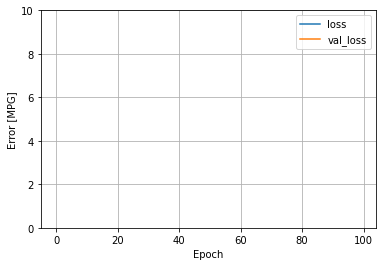

In [40]:
plot_loss(history)